- Main target of this mini-project is: "Performing data cleaning & EDA of a dataset of my choice"

Data preparation:

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [3]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


"DATA EXPLORATION & EDA"

In [8]:
# (1) Getting the dataset shape:
print(titanic.shape)

(891, 12)


In [10]:
# (2) Checking if there's any NULL values in the dataset:
titanic.isnull().values.any()

True

In [13]:
# So, there's some Null values in the dataset, let's figure out where exactly is it:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# (3) Getting the data infos:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [12]:
# Getting more facts about the categorical data:
print(titanic.describe(include=['O']))

                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


In [15]:
'''
Loop through each column in the DataFrame:
 - For object dtype columns& filling missing values with the mode (most frequent value) of that column.
 - For non-object dtype columns, it fills missing values with the mean value of that column. 
'''

for col in titanic.columns:
    if titanic[col].isnull().any():

        if titanic[col].dtype == 'object':

            titanic[col].fillna(titanic[col].mode().iloc[0], inplace=True)

        else:
            
            titanic[col].fillna(titanic[col].mean(), inplace=True)

# Display the sum of missing values in each column after imputation
print(titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


- "DATA VISUALIZATION"

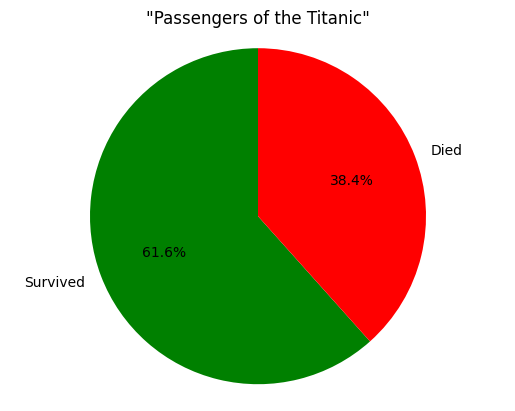

In [21]:
# Creating a pie chart for the passenger rather they survived or not:
labels = ['Survived', 'Died']
colors = ['green', 'red']

plt.pie(titanic['Survived'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('"Passengers of the Titanic"')
plt.axis('equal')
plt.show()

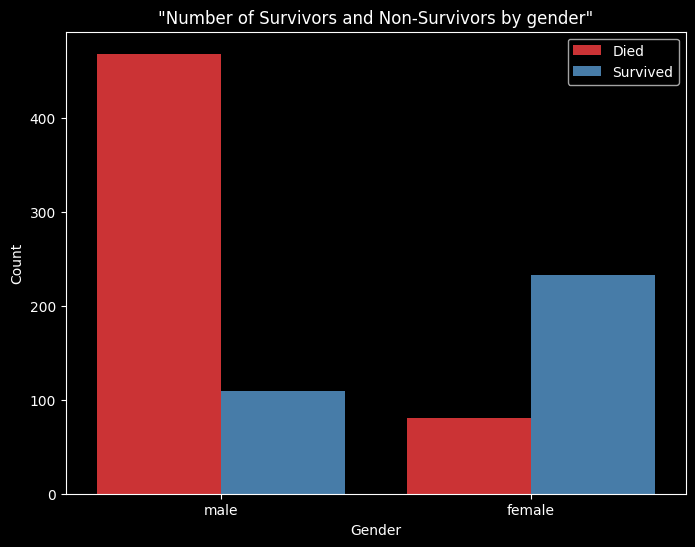

In [57]:
# Create a count plot for males and females (survivors and non-survivors):
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic, palette='Set1')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('"Number of Survivors and Non-Survivors by gender"')

# Show the plot
plt.legend(loc='upper right', labels = ['Died', 'Survived'])
plt.show()